# Defining parameters, outliers and data frame

In [1]:
specifics = 'calculated_limb_calculated_alpha'

In [2]:
path = "current_fits"
line_list = "1"
code = "turbospectrum"

In [3]:
from automatic_calculated_limb_calculated_alpha import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from math import *
from datetime import datetime

In [4]:
sweet_cat_parameters = pd.read_csv("all_spectra_parameters.csv")
sweet_cat_parameters

,ind,Spectra,SNR,Resolution,Star,Star_SC,teff,err_teff,logg,err_logg,vmic,err_vmic,MH,err_MH,vsini,err_up_vsini,err_down_vsini
0,0,HD19994A_HARPSS_115000_378_691_2020.fits,2021.85,115000,HD19994A,HD 19994 A,6249,27,4.26,0.04,1.57,0.03,0.27,0.02,8.60,1.720,-1.720
1,1,HD60532_HARPSS_115000_378_691_2020.fits,1940.86,115000,HD60532,HD 60532,6281,34,4.00,0.04,1.80,0.04,-0.07,0.02,8.00,1.600,-1.600
2,2,HR858_HARPSS_115000_378_691_2020.fits,1772.89,115000,HR858,HR 858,6360,26,4.50,0.04,1.51,0.04,-0.02,0.02,8.30,0.500,-0.500
3,3,HD10647_HARPSS_115000_378_691_2020.fits,1696.77,115000,HD10647,HD 10647,6178,20,4.49,0.03,1.26,0.03,-0.01,0.01,4.90,0.980,-0.980
4,4,HD208487_HARPSS_115000_378_691_2020.fits,1461.86,115000,HD208487,HD 208487,6137,18,4.46,0.03,1.21,0.03,0.09,0.01,4.61,0.922,-0.922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,90,WASP-135_SOPHIE_HE_2020.fits,82.53,40000,WASP-135,WASP-135,5052,77,4.11,0.22,0.85,0.14,0.17,0.05,4.67,0.890,-0.890
91,91,WASP-139_HARPSS_115000_378_691_2020.fits,56.31,115000,WASP-139,WASP-139,5215,38,4.35,0.08,0.82,0.07,0.12,0.03,4.20,1.100,-1.100
92,92,WASP-150_SOPHIE_HE_2020.fits,127.76,40000,WASP-150,WASP-150,6486,48,4.46,0.09,1.61,0.06,0.27,0.03,8.82,0.950,-0.950
93,93,WASP-173A_HARPSS_115000_378_691_2020.fits,110.24,115000,WASP-173A,KELT-22A,5803,26,4.45,0.04,1.29,0.03,0.21,0.02,6.10,0.300,-0.300


In [5]:
sweet_cat_parameters.astype({'vmic': 'float', 'err_vmic': 'float'}).dtypes
sweet_cat_parameters

,ind,Spectra,SNR,Resolution,Star,Star_SC,teff,err_teff,logg,err_logg,vmic,err_vmic,MH,err_MH,vsini,err_up_vsini,err_down_vsini
0,0,HD19994A_HARPSS_115000_378_691_2020.fits,2021.85,115000,HD19994A,HD 19994 A,6249,27,4.26,0.04,1.57,0.03,0.27,0.02,8.60,1.720,-1.720
1,1,HD60532_HARPSS_115000_378_691_2020.fits,1940.86,115000,HD60532,HD 60532,6281,34,4.00,0.04,1.80,0.04,-0.07,0.02,8.00,1.600,-1.600
2,2,HR858_HARPSS_115000_378_691_2020.fits,1772.89,115000,HR858,HR 858,6360,26,4.50,0.04,1.51,0.04,-0.02,0.02,8.30,0.500,-0.500
3,3,HD10647_HARPSS_115000_378_691_2020.fits,1696.77,115000,HD10647,HD 10647,6178,20,4.49,0.03,1.26,0.03,-0.01,0.01,4.90,0.980,-0.980
4,4,HD208487_HARPSS_115000_378_691_2020.fits,1461.86,115000,HD208487,HD 208487,6137,18,4.46,0.03,1.21,0.03,0.09,0.01,4.61,0.922,-0.922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,90,WASP-135_SOPHIE_HE_2020.fits,82.53,40000,WASP-135,WASP-135,5052,77,4.11,0.22,0.85,0.14,0.17,0.05,4.67,0.890,-0.890
91,91,WASP-139_HARPSS_115000_378_691_2020.fits,56.31,115000,WASP-139,WASP-139,5215,38,4.35,0.08,0.82,0.07,0.12,0.03,4.20,1.100,-1.100
92,92,WASP-150_SOPHIE_HE_2020.fits,127.76,40000,WASP-150,WASP-150,6486,48,4.46,0.09,1.61,0.06,0.27,0.03,8.82,0.950,-0.950
93,93,WASP-173A_HARPSS_115000_378_691_2020.fits,110.24,115000,WASP-173A,KELT-22A,5803,26,4.45,0.04,1.29,0.03,0.21,0.02,6.10,0.300,-0.300


In [6]:
sweet_cat_parameters['ispec_vsini']=''
sweet_cat_parameters['ispec_vsini_err']=''
sweet_cat_parameters['ispec_vsini_per_err']=''
sweet_cat_parameters['ispec_vsini_per_un']=''
sweet_cat_parameters['ispec_rv']=''
sweet_cat_parameters['ispec_rv_err']=''
sweet_cat_parameters['ispec_vmac']=''
sweet_cat_parameters['ispec_alpha']=''
sweet_cat_parameters['ispec_alpha_err']=''
sweet_cat_parameters['ispec_limb_dark_coeff']=''
sweet_cat_parameters.loc[k, 'sigma_teff_up']=''
sweet_cat_parameters.loc[k, 'sigma_teff_down']=''
sweet_cat_parameters.loc[k, 'sigma_logg_up']=''
sweet_cat_parameters.loc[k, 'sigma_logg_down']=''
sweet_cat_parameters.loc[k, 'sigma_MH_up']=''
sweet_cat_parameters.loc[k, 'sigma_MH_down']=''
sweet_cat_parameters.loc[k, 'sigma_vmic_up']=''
sweet_cat_parameters.loc[k, 'sigma_vmic_down']=''
sweet_cat_parameters.loc[k, 'quadratic_sum_up']=''
sweet_cat_parameters.loc[k, 'quadratic_sum_down']=''
sweet_cat_parameters

,ind,Spectra,SNR,Resolution,Star,Star_SC,teff,err_teff,logg,err_logg,...,sigma_teff_up,sigma_teff_down,sigma_logg_up,sigma_logg_down,sigma_MH_up,sigma_MH_down,sigma_vmic_up,sigma_vmic_down,quadratic_sum_up,quadratic_sum_down
0,0,HD19994A_HARPSS_115000_378_691_2020.fits,2021.85,115000,HD19994A,HD 19994 A,6249,27,4.26,0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,HD60532_HARPSS_115000_378_691_2020.fits,1940.86,115000,HD60532,HD 60532,6281,34,4.00,0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,HR858_HARPSS_115000_378_691_2020.fits,1772.89,115000,HR858,HR 858,6360,26,4.50,0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,HD10647_HARPSS_115000_378_691_2020.fits,1696.77,115000,HD10647,HD 10647,6178,20,4.49,0.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,HD208487_HARPSS_115000_378_691_2020.fits,1461.86,115000,HD208487,HD 208487,6137,18,4.46,0.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,90,WASP-135_SOPHIE_HE_2020.fits,82.53,40000,WASP-135,WASP-135,5052,77,4.11,0.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,91,WASP-139_HARPSS_115000_378_691_2020.fits,56.31,115000,WASP-139,WASP-139,5215,38,4.35,0.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,92,WASP-150_SOPHIE_HE_2020.fits,127.76,40000,WASP-150,WASP-150,6486,48,4.46,0.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,93,WASP-173A_HARPSS_115000_378_691_2020.fits,110.24,115000,WASP-173A,KELT-22A,5803,26,4.45,0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:

outliers = ['HD66141', 'KPS-1','Kepler-41', 'CoRoT-4', 'HD133131B', 'HATS-3','WASP-87A', 'Kepler-40', 'Kepler-435']

print(sweet_cat_parameters[sweet_cat_parameters['Star']=='HD66141']['ind'])
print(sweet_cat_parameters[sweet_cat_parameters['Star']=='KPS-1']['ind'])
print(sweet_cat_parameters[sweet_cat_parameters['Star']=='Kepler-41']['ind'])
print(sweet_cat_parameters[sweet_cat_parameters['Star']=='CoRoT-4']['ind'])
print(sweet_cat_parameters[sweet_cat_parameters['Star']=='HD133131B']['ind'])
print(sweet_cat_parameters[sweet_cat_parameters['Star']=='HATS-3']['ind'])
print(sweet_cat_parameters[sweet_cat_parameters['Star']=='WASP-87A']['ind'])
print(sweet_cat_parameters[sweet_cat_parameters['Star']=='Kepler-40']['ind'])
print(sweet_cat_parameters[sweet_cat_parameters['Star']=='Kepler-435']['ind'])



28    28
Name: ind, dtype: int64
85    85
Name: ind, dtype: int64
78    78
Name: ind, dtype: int64
59    59
Name: ind, dtype: int64
41    41
Name: ind, dtype: int64
27    27
Name: ind, dtype: int64
58    58
Name: ind, dtype: int64
76    76
Name: ind, dtype: int64
80    80
Name: ind, dtype: int64


# Testing 

In [8]:
#testing strategies

# df = pd.read_csv("/home/spec/Programs/iSpec/automatization/results/test.txt", delimiter='\t')

# print(df['vsini'])
# print(df['time'].values[0])
# print(df[df['code']=='turbospectrum']['time'])
# print(df[df['code']=='turbospectrum']['time'][0])

# #tester time
# date_str = df['time'].values[0]
# date_format = '%d/%m/%Y %H:%M:%S'
# date_obj = datetime.strptime(date_str, date_format)

# #now time
# now = datetime.now()
# dt_string = now.strftime("%d/%m/%Y %H:%M:%S")

# print("\ntester time: ",date_obj)
# print("now time: ", now)
# print("is tester time smaller/older than now time? ", date_obj <= now)
# print("which one is older? ", min(date_obj, now))
# print("which one is more recent? ", max(date_obj, now))
# print("\n")
# turbo = df[df['code']=='turbospectrum']
# print(turbo)
# turbo1 = turbo[turbo['line list']==1]
# print(turbo1)
# print(max(turbo1['time']))

# print(df[df['time']==max(turbo1['time'])]['vsini'])
# print(df[df['time']==max(turbo1['time'])]['vsini'].values[0])

# df_up = pd.read_csv("/home/spec/Programs/iSpec/automatization/results/{}_error_up.txt".format('WASP-173A'), delimiter='\t')

# #df_up.columns
# turbo_up = df_up[df_up['code']=='turbospectrum']
# turbo1_up = turbo_up[turbo_up['line list']==1] 

# turbo1_up_teff = turbo1_up[turbo1_up['parameter']=='teff']

# turbo1_up_teff

# Compiling results

In [9]:
#results compilation

stars = []
vmic = []
teff = []
MH = []
logg = []
vmic_err = []
teff_err = []
MH_err = []
logg_err = []
vsini_lit = []
vsini_lit_err_up = []
vsini_lit_err_down = []

vsini_turbo_1 = []
vsini_err_turbo_1 = []
vsini_per_err_turbo_1 = []
vsini_per_un_turbo_1 = []
rv_turbo_1 = []
rv_err_turbo_1 = []
vmac_turbo_1 = []
alpha_turbo_1 = []
alpha_err_turbo_1 = []
limb_dark_coeff_turbo_1 = []
vsini_diff_turbo_1 = [] 

#teff +sigma
vsini_teff_up = []
vsini_err_teff_up = []
vsini_per_err_teff_up = []
vsini_per_un_teff_up = []
vsini_diff_teff_up = []

#logg +sigma
vsini_logg_up = []
vsini_err_logg_up = []
vsini_per_err_logg_up = []
vsini_per_un_logg_up = []
vsini_diff_logg_up = []

#vmic +sigma
vsini_vmic_up = []
vsini_err_vmic_up = []
vsini_per_err_vmic_up = []
vsini_per_un_vmic_up = []
vsini_diff_vmic_up = []

#MH +sigma
vsini_MH_up = []
vsini_err_MH_up = []
vsini_per_err_MH_up = []
vsini_per_un_MH_up = []
vsini_diff_MH_up = []

#teff -sigma
vsini_teff_down = []
vsini_err_teff_down = []
vsini_per_err_teff_down = []
vsini_per_un_teff_down = []
vsini_diff_teff_down = []

#logg -sigma
vsini_logg_down = []
vsini_err_logg_down = []
vsini_per_err_logg_down = []
vsini_per_un_logg_down = []
vsini_diff_logg_down = []

#vmic -sigma
vsini_vmic_down = []
vsini_err_vmic_down = []
vsini_per_err_vmic_down = []
vsini_per_un_vmic_down = []
vsini_diff_vmic_down = []

#MH -sigma
vsini_MH_down = []
vsini_err_MH_down = []
vsini_per_err_MH_down = []
vsini_per_un_MH_down = []
vsini_diff_MH_down = []

quadratic_sum_up = []
quadratic_sum_down = []

#for i, star_file in enumerate(sweet_cat_parameters['Spectra']):
for i, star_name in enumerate(sweet_cat_parameters['Star']):
    if star_name not in outliers:
        #star_name = sweet_cat_parameters['Star'][i]
        #print(i, star_name)
        stars.append(star_name)
        vmic.append(sweet_cat_parameters['vmic'][i])
        teff.append(sweet_cat_parameters['teff'][i])
        MH.append(sweet_cat_parameters['MH'][i])
        logg.append(sweet_cat_parameters['logg'][i])
        vmic_err.append(sweet_cat_parameters['err_vmic'][i])
        teff_err.append(sweet_cat_parameters['err_teff'][i])
        MH_err.append(sweet_cat_parameters['err_MH'][i])
        logg_err.append(sweet_cat_parameters['err_logg'][i])
        vsini_lit.append(sweet_cat_parameters['vsini'][i])
        vsini_lit_err_up.append(sweet_cat_parameters['err_up_vsini'][i])
        vsini_lit_err_down.append(sweet_cat_parameters['err_down_vsini'][i])
        
        #average values
        df = pd.read_csv("/home/spec/Programs/iSpec/automatization/results/{}.txt".format(star_name), delimiter='\t')
        turbo = df[df['code']=='turbospectrum']
        turbo1 = turbo[turbo['line list']==1]
        
        vsini_turbo_1_value = df[df['time']==max(turbo1['time'])]['vsini'].values[0]
        vsini_turbo_1.append(df[df['time']==max(turbo1['time'])]['vsini'].values[0])
        sigma_vsini = df[df['time']==max(turbo1['time'])]['vsini_err'].values[0]
        vsini_err_turbo_1.append(df[df['time']==max(turbo1['time'])]['vsini_err'].values[0])
        vsini_per_err_turbo_1.append(df[df['time']==max(turbo1['time'])]['vsini_per_err'].values[0])
        vsini_per_un_turbo_1.append(df[df['time']==max(turbo1['time'])]['vsini_per_un'].values[0])
        rv_turbo_1.append(df[df['time']==max(turbo1['time'])]['rv'].values[0])
        rv_err_turbo_1.append(df[df['time']==max(turbo1['time'])]['rv_err'].values[0])
        vmac_turbo_1.append(df[df['time']==max(turbo1['time'])]['v_mac'].values[0])
        alpha_turbo_1.append(df[df['time']==max(turbo1['time'])]['alpha'].values[0])
        alpha_err_turbo_1.append(df[df['time']==max(turbo1['time'])]['alpha_err'].values[0])
        limb_dark_coeff_turbo_1.append(df[df['time']==max(turbo1['time'])]['limb_dark_coeff'].values[0])
        
        vsini_diff = sweet_cat_parameters['vsini'][i] - vsini_turbo_1_value
        vsini_diff_turbo_1.append(vsini_diff)
        
        
        #+ sigma
        df_up = pd.read_csv("/home/spec/Programs/iSpec/automatization/results/{}_error_up.txt".format(star_name), delimiter='\t')
        turbo_up = df_up[df_up['code']=='turbospectrum']
        turbo1_up = turbo_up[turbo_up['line list']==1] 
        
        #teff +sigma
        turbo1_up_teff = turbo1_up[turbo1_up['parameter']=='teff'] 
        
        vsini_teff_up_value = turbo1_up_teff[turbo1_up_teff['time']==max(turbo1_up_teff['time'])]['vsini'].values[0]
        vsini_teff_up.append(turbo1_up_teff[turbo1_up_teff['time']==max(turbo1_up_teff['time'])]['vsini'].values[0])
        vsini_err_teff_up.append(turbo1_up_teff[turbo1_up_teff['time']==max(turbo1_up_teff['time'])]['vsini_err'].values[0])
        vsini_per_err_teff_up.append(turbo1_up_teff[turbo1_up_teff['time']==max(turbo1_up_teff['time'])]['vsini_per_err'].values[0])
        vsini_per_un_teff_up.append(turbo1_up_teff[turbo1_up_teff['time']==max(turbo1_up_teff['time'])]['vsini_per_un'].values[0])
        
        vsini_diff = sweet_cat_parameters['vsini'][i] - vsini_teff_up_value
        vsini_diff_teff_up.append(vsini_diff)
        
        sigma_teff_up = vsini_turbo_1_value - vsini_teff_up_value
        
        #logg +sigma
        turbo1_up_logg = turbo1_up[turbo1_up['parameter']=='logg'] 
        
        vsini_logg_up_value = turbo1_up_logg[turbo1_up_logg['time']==max(turbo1_up_logg['time'])]['vsini'].values[0]
        vsini_logg_up.append(turbo1_up_logg[turbo1_up_logg['time']==max(turbo1_up_logg['time'])]['vsini'].values[0])
        vsini_err_logg_up.append(turbo1_up_logg[turbo1_up_logg['time']==max(turbo1_up_logg['time'])]['vsini_err'].values[0])
        vsini_per_err_logg_up.append(turbo1_up_logg[turbo1_up_logg['time']==max(turbo1_up_logg['time'])]['vsini_per_err'].values[0])
        vsini_per_un_logg_up.append(turbo1_up_logg[turbo1_up_logg['time']==max(turbo1_up_logg['time'])]['vsini_per_un'].values[0])
        
        vsini_diff = sweet_cat_parameters['vsini'][i] - vsini_logg_up_value
        vsini_diff_logg_up.append(vsini_diff)
        
        sigma_logg_up = vsini_turbo_1_value - vsini_logg_up_value
        
        #vmic +sigma
        turbo1_up_vmic = turbo1_up[turbo1_up['parameter']=='vmic'] 
        
        vsini_vmic_up_value = turbo1_up_vmic[turbo1_up_vmic['time']==max(turbo1_up_vmic['time'])]['vsini'].values[0]
        vsini_vmic_up.append(turbo1_up_vmic[turbo1_up_vmic['time']==max(turbo1_up_vmic['time'])]['vsini'].values[0])
        vsini_err_vmic_up.append(turbo1_up_vmic[turbo1_up_vmic['time']==max(turbo1_up_vmic['time'])]['vsini_err'].values[0])
        vsini_per_err_vmic_up.append(turbo1_up_vmic[turbo1_up_vmic['time']==max(turbo1_up_vmic['time'])]['vsini_per_err'].values[0])
        vsini_per_un_vmic_up.append(turbo1_up_vmic[turbo1_up_vmic['time']==max(turbo1_up_vmic['time'])]['vsini_per_un'].values[0])
        
        vsini_diff = sweet_cat_parameters['vsini'][i] - vsini_vmic_up_value
        vsini_diff_vmic_up.append(vsini_diff)
        
        sigma_vmic_up = vsini_turbo_1_value - vsini_vmic_up_value
        
        #MH +sigma
        turbo1_up_MH = turbo1_up[turbo1_up['parameter']=='MH'] 
        
        vsini_MH_up_value = turbo1_up_MH[turbo1_up_MH['time']==max(turbo1_up_MH['time'])]['vsini'].values[0]
        vsini_MH_up.append(turbo1_up_MH[turbo1_up_MH['time']==max(turbo1_up_MH['time'])]['vsini'].values[0])
        vsini_err_MH_up.append(turbo1_up_MH[turbo1_up_MH['time']==max(turbo1_up_MH['time'])]['vsini_err'].values[0])
        vsini_per_err_MH_up.append(turbo1_up_MH[turbo1_up_MH['time']==max(turbo1_up_MH['time'])]['vsini_per_err'].values[0])
        vsini_per_un_MH_up.append(turbo1_up_MH[turbo1_up_MH['time']==max(turbo1_up_MH['time'])]['vsini_per_un'].values[0])
        
        vsini_diff = sweet_cat_parameters['vsini'][i] - vsini_MH_up_value
        vsini_diff_MH_up.append(vsini_diff)
        
        sigma_MH_up = vsini_turbo_1_value - vsini_MH_up_value
        
        #- sigma
        df_down = pd.read_csv("/home/spec/Programs/iSpec/automatization/results/{}_error_low.txt".format(star_name), delimiter='\t')
        turbo_down = df_down[df_down['code']=='turbospectrum']
        turbo1_down = turbo_down[turbo_down['line list']==1] 
        
        #teff +sigma
        turbo1_down_teff = turbo1_down[turbo1_down['parameter']=='teff'] 
        
        vsini_teff_down_value = turbo1_down_teff[turbo1_down_teff['time']==max(turbo1_down_teff['time'])]['vsini'].values[0]
        vsini_teff_down.append(turbo1_down_teff[turbo1_down_teff['time']==max(turbo1_down_teff['time'])]['vsini'].values[0])
        vsini_err_teff_down.append(turbo1_down_teff[turbo1_down_teff['time']==max(turbo1_down_teff['time'])]['vsini_err'].values[0])
        vsini_per_err_teff_down.append(turbo1_down_teff[turbo1_down_teff['time']==max(turbo1_down_teff['time'])]['vsini_per_err'].values[0])
        vsini_per_un_teff_down.append(turbo1_down_teff[turbo1_down_teff['time']==max(turbo1_down_teff['time'])]['vsini_per_un'].values[0])
        
        vsini_diff = sweet_cat_parameters['vsini'][i] - vsini_teff_down_value
        vsini_diff_teff_down.append(vsini_diff)
        
        sigma_teff_down = vsini_turbo_1_value - vsini_teff_down_value
        
        #logg -sigma
        turbo1_down_logg = turbo1_down[turbo1_down['parameter']=='logg'] 
        
        vsini_logg_down_value = turbo1_down_logg[turbo1_down_logg['time']==max(turbo1_down_logg['time'])]['vsini'].values[0]
        vsini_logg_down.append(turbo1_down_logg[turbo1_down_logg['time']==max(turbo1_down_logg['time'])]['vsini'].values[0])
        vsini_err_logg_down.append(turbo1_down_logg[turbo1_down_logg['time']==max(turbo1_down_logg['time'])]['vsini_err'].values[0])
        vsini_per_err_logg_down.append(turbo1_down_logg[turbo1_down_logg['time']==max(turbo1_down_logg['time'])]['vsini_per_err'].values[0])
        vsini_per_un_logg_down.append(turbo1_down_logg[turbo1_down_logg['time']==max(turbo1_down_logg['time'])]['vsini_per_un'].values[0])
        
        vsini_diff = sweet_cat_parameters['vsini'][i] - vsini_logg_down_value
        vsini_diff_logg_down.append(vsini_diff)
        
        sigma_logg_down = vsini_turbo_1_value - vsini_logg_down_value
        
        #vmic -sigma
        turbo1_down_vmic = turbo1_down[turbo1_down['parameter']=='vmic'] 
        
        vsini_vmic_down_value = turbo1_down_vmic[turbo1_down_vmic['time']==max(turbo1_down_vmic['time'])]['vsini'].values[0]
        vsini_vmic_down.append(turbo1_down_vmic[turbo1_down_vmic['time']==max(turbo1_down_vmic['time'])]['vsini'].values[0])
        vsini_err_vmic_down.append(turbo1_down_vmic[turbo1_down_vmic['time']==max(turbo1_down_vmic['time'])]['vsini_err'].values[0])
        vsini_per_err_vmic_down.append(turbo1_down_vmic[turbo1_down_vmic['time']==max(turbo1_down_vmic['time'])]['vsini_per_err'].values[0])
        vsini_per_un_vmic_down.append(turbo1_down_vmic[turbo1_down_vmic['time']==max(turbo1_down_vmic['time'])]['vsini_per_un'].values[0])
        
        vsini_diff = sweet_cat_parameters['vsini'][i] - vsini_vmic_down_value
        vsini_diff_vmic_down.append(vsini_diff)
        
        sigma_vmic_down = vsini_turbo_1_value - vsini_vmic_down_value
        
        #MH -sigma
        turbo1_down_MH = turbo1_down[turbo1_down['parameter']=='MH'] 
        
        vsini_MH_down_value = turbo1_down_MH[turbo1_down_MH['time']==max(turbo1_down_MH['time'])]['vsini'].values[0]
        vsini_MH_down.append(turbo1_down_MH[turbo1_down_MH['time']==max(turbo1_down_MH['time'])]['vsini'].values[0])
        vsini_err_MH_down.append(turbo1_down_MH[turbo1_down_MH['time']==max(turbo1_down_MH['time'])]['vsini_err'].values[0])
        vsini_per_err_MH_down.append(turbo1_down_MH[turbo1_down_MH['time']==max(turbo1_down_MH['time'])]['vsini_per_err'].values[0])
        vsini_per_un_MH_down.append(turbo1_down_MH[turbo1_down_MH['time']==max(turbo1_down_MH['time'])]['vsini_per_un'].values[0])
        
        vsini_diff = sweet_cat_parameters['vsini'][i] - vsini_MH_down_value
        vsini_diff_MH_down.append(vsini_diff)
        
        sigma_MH_down = vsini_turbo_1_value - vsini_MH_down_value
                
        qs_up = np.sqrt(sigma_teff_up**2 + sigma_logg_up**2 + sigma_vmic_up**2 + sigma_MH_up**2 + sigma_vsini**2)
        
        qs_down = np.sqrt(sigma_teff_down**2 + sigma_logg_down**2 + sigma_vmic_down**2 + sigma_MH_down**2 + sigma_vsini**2)
        
        quadratic_sum_up.append(qs_up)
        
        quadratic_sum_down.append(qs_down)
        
        
        #sweet_cat_parameters = sweet_cat_parameters.copy()
        k = sweet_cat_parameters.loc[sweet_cat_parameters['Star']==star_name]['ind'].values[0]
        sweet_cat_parameters.loc[k, 'ispec_vsini']=vsini_turbo_1_value
        sweet_cat_parameters.loc[k, 'ispec_vsini_err']=sigma_vsini
        sweet_cat_parameters.loc[k, 'ispec_vsini_per_err']=df[df['time']==max(turbo1['time'])]['vsini_per_err'].values[0]
        sweet_cat_parameters.loc[k, 'ispec_vsini_per_un']=df[df['time']==max(turbo1['time'])]['vsini_per_un'].values[0]
        sweet_cat_parameters.loc[k, 'ispec_rv']=df[df['time']==max(turbo1['time'])]['rv'].values[0]
        sweet_cat_parameters.loc[k, 'ispec_rv_err']=df[df['time']==max(turbo1['time'])]['rv_err'].values[0]
        sweet_cat_parameters.loc[k, 'ispec_vmac']=df[df['time']==max(turbo1['time'])]['v_mac'].values[0]
        sweet_cat_parameters.loc[k, 'ispec_alpha']=df[df['time']==max(turbo1['time'])]['alpha'].values[0]
        sweet_cat_parameters.loc[k, 'ispec_alpha_err']=df[df['time']==max(turbo1['time'])]['alpha_err'].values[0]
        sweet_cat_parameters.loc[k, 'ispec_limb_dark_coeff']=df[df['time']==max(turbo1['time'])]['limb_dark_coeff'].values[0]
        sweet_cat_parameters.loc[k, 'sigma_teff_up']=sigma_teff_up
        sweet_cat_parameters.loc[k, 'sigma_teff_down']=sigma_teff_down
        sweet_cat_parameters.loc[k, 'sigma_logg_up']=sigma_logg_up
        sweet_cat_parameters.loc[k, 'sigma_logg_down']=sigma_logg_down
        sweet_cat_parameters.loc[k, 'sigma_MH_up']=sigma_MH_up
        sweet_cat_parameters.loc[k, 'sigma_MH_down']=sigma_MH_up
        sweet_cat_parameters.loc[k, 'sigma_vmic_up']=sigma_vmic_up
        sweet_cat_parameters.loc[k, 'sigma_vmic_down']=sigma_vmic_down
        sweet_cat_parameters.loc[k, 'quadratic_sum_up']=qs_up
        sweet_cat_parameters.loc[k, 'quadratic_sum_down']=qs_down
        
#         vsini_err_turbo_1.append(df[df['time']==max(turbo1['time'])]['vsini_err'].values[0])
#         vsini_per_err_turbo_1.append(df[df['time']==max(turbo1['time'])]['vsini_per_err'].values[0])
#         vsini_per_un_turbo_1.append(df[df['time']==max(turbo1['time'])]['vsini_per_un'].values[0])
#         rv_turbo_1.append(df[df['time']==max(turbo1['time'])]['rv'].values[0])
#         rv_err_turbo_1.append(df[df['time']==max(turbo1['time'])]['rv_err'].values[0])
#         vmac_turbo_1.append(df[df['time']==max(turbo1['time'])]['v_mac'].values[0])
#         alpha_turbo_1.append(df[df['time']==max(turbo1['time'])]['alpha'].values[0])
#         alpha_err_turbo_1.append(df[df['time']==max(turbo1['time'])]['alpha_err'].values[0])
#         limb_dark_coeff_turbo_1.append(df[df['time']==max(turbo1['time'])]['limb_dark_coeff'].values[0])


# Saving results in files and turning lists into arrays

In [10]:

# saving the dataframe
sweet_cat_parameters = sweet_cat_parameters.drop(labels=[27,28,41,58,59,76,78,80,85], axis=0) #removing outliers
sweet_cat_parameters.to_excel('results_{}_{}.xlsx'.format(code, line_list))
sweet_cat_parameters.to_csv('results_{}_{}.txt'.format(code, line_list), sep='\t')


# making the vsini table with errors

table = {'Star': stars, 'vsini': vsini_turbo_1, 'vsini_err':vsini_err_turbo_1, 'vsini_teff_up':vsini_teff_up, 'vsini_teff_down':vsini_teff_down,
        'vsini_logg_up':vsini_logg_up,'vsini_logg_down':vsini_logg_down, 'vsini_vmic_up':vsini_vmic_up, 'vsini_vmic_down':vsini_vmic_down,
        'vsini_MH_up':vsini_MH_up, 'vsini_MH_down':vsini_MH_down, 'quadratic_sum_up':quadratic_sum_up , 'quadratic_sum_down':quadratic_sum_down}

df_table = pd.DataFrame(table)

df_table.to_excel('vsini_with_all_errors_{}_{}.xlsx'.format(code, line_list))
df_table.to_csv('vsini_with_all_errors_{}_{}.txt'.format(code, line_list), sep='\t')




In [11]:
vmic = np.array(vmic)
teff = np.array(teff)
MH = np.array(MH)
logg = np.array(logg)
vmic_err = np.array(vmic_err)
teff_err = np.array(teff_err)
MH_err = np.array(MH_err)
logg_err = np.array(logg_err)
vsini_lit = np.array(vsini_lit)
vsini_lit_err_up = np.array(vsini_lit_err_up)
vsini_lit_err_down = np.array(vsini_lit_err_down)

vsini = np.array(vsini_turbo_1)
vsini_err = np.array(vsini_err_turbo_1)
vsini_per_err = np.array(vsini_per_err_turbo_1)
vsini_per_un = np.array(vsini_per_un_turbo_1)
rv = np.array(rv_turbo_1)
rv_err = np.array(rv_err_turbo_1)
vmac = np.array(vmac_turbo_1)
alpha = np.array(alpha_turbo_1)
alpha_err = np.array(alpha_err_turbo_1)
limb_dark_coeff = np.array(limb_dark_coeff_turbo_1)
vsini_diff = np.array(vsini_diff_turbo_1)

vsini_diff_sigma_up = np.sqrt(vsini_lit_err_up**2 + vsini_err**2)
vsini_diff_sigma_down = np.sqrt(vsini_lit_err_down**2 + vsini_err**2)

#teff +sigma
vsini_teff_up = np.array(vsini_teff_up)
vsini_err_teff_up = np.array(vsini_err_teff_up)
vsini_per_err_teff_up = np.array(vsini_per_err_teff_up)
vsini_per_un_teff_up = np.array(vsini_per_un_teff_up)
vsini_diff_teff_up = np.array(vsini_diff_teff_up)

#logg +sigma
vsini_logg_up = np.array(vsini_logg_up)
vsini_err_logg_up = np.array(vsini_err_logg_up)
vsini_per_err_logg_up = np.array(vsini_per_err_logg_up)
vsini_per_un_logg_up = np.array(vsini_per_un_logg_up)
vsini_diff_logg_up = np.array(vsini_diff_logg_up)

#vmic +sigma
vsini_vmic_up = np.array(vsini_vmic_up)
vsini_err_vmic_up = np.array(vsini_err_vmic_up)
vsini_per_err_vmic_up = np.array(vsini_per_err_vmic_up)
vsini_per_un_vmic_up = np.array(vsini_per_un_vmic_up)
vsini_diff_vmic_up = np.array(vsini_diff_vmic_up)

#MH +sigma
vsini_MH_up = np.array(vsini_MH_up)
vsini_err_MH_up = np.array(vsini_err_MH_up)
vsini_per_err_MH_up = np.array(vsini_per_err_MH_up)
vsini_per_un_MH_up = np.array(vsini_per_un_MH_up)
vsini_diff_MH_up = np.array(vsini_diff_MH_up)

#teff -sigma
vsini_teff_down = np.array(vsini_teff_down)
vsini_err_teff_down = np.array(vsini_err_teff_down)
vsini_per_err_teff_down = np.array(vsini_per_err_teff_down)
vsini_per_un_teff_down = np.array(vsini_per_un_teff_down)
vsini_diff_teff_down = np.array(vsini_diff_teff_down)

#logg -sigma
vsini_logg_down = np.array(vsini_logg_down)
vsini_err_logg_down = np.array(vsini_err_logg_down)
vsini_per_err_logg_down = np.array(vsini_per_err_logg_down)
vsini_per_un_logg_down = np.array(vsini_per_un_logg_down)
vsini_diff_logg_down = np.array(vsini_diff_logg_down)

#vmic -sigma
vsini_vmic_down = np.array(vsini_vmic_down)
vsini_err_vmic_down = np.array(vsini_err_vmic_down)
vsini_per_err_vmic_down = np.array(vsini_per_err_vmic_down)
vsini_per_un_vmic_down = np.array(vsini_per_un_vmic_down)
vsini_diff_vmic_down = np.array(vsini_diff_vmic_down)

#MH -sigma
vsini_MH_down = np.array(vsini_MH_down)
vsini_err_MH_down = np.array(vsini_err_MH_down)
vsini_per_err_MH_down = np.array(vsini_per_err_MH_down)
vsini_per_un_MH_down = np.array(vsini_per_un_MH_down)
vsini_diff_MH_down = np.array(vsini_diff_MH_down)

quadratic_sum_up = np.array(quadratic_sum_up)
quadratic_sum_down = np.array(quadratic_sum_down)

In [12]:
print(np.min(vsini_per_err))
print(np.max(vsini_per_err))
print(np.min(vsini_per_un))
print(np.max(vsini_per_un))

0.0528904441984056
208.05103526943796
0.3298665833525226
121.37977754045066


# Plots

## vsini & vsini_lit vs. Stars

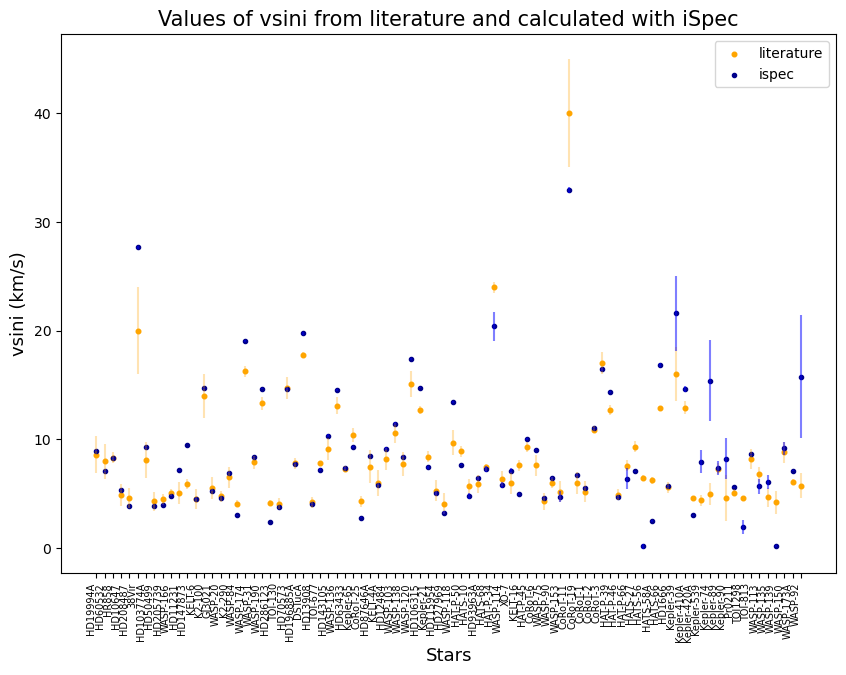

In [13]:
plt.figure(figsize=(10,7))

bar = np.array([-vsini_lit_err_down , vsini_lit_err_up], dtype=float)

#literature
plt.scatter(stars, vsini_lit, color='orange', s=11, zorder=0, label='literature') 
plt.errorbar(stars, vsini_lit, yerr=bar, fmt='none', ecolor='orange', alpha=0.3, zorder=10)
                        
#ispec
plt.scatter(stars, vsini, color='darkblue', s=9, zorder=5, label='ispec') 
plt.errorbar(stars, vsini, yerr=vsini_err, fmt='none', ecolor='blue', alpha=0.5, zorder=10)

plt.xlabel('Stars', size=13)
plt.ylabel('vsini (km/s)', size=13)
plt.title('Values of vsini from literature and calculated with iSpec', size=15)
plt.xticks(rotation=90, ha='right', size=7)                                                     
plt.legend()
plt.show()


## vsini_ispec vs vsini_lit (identity line)

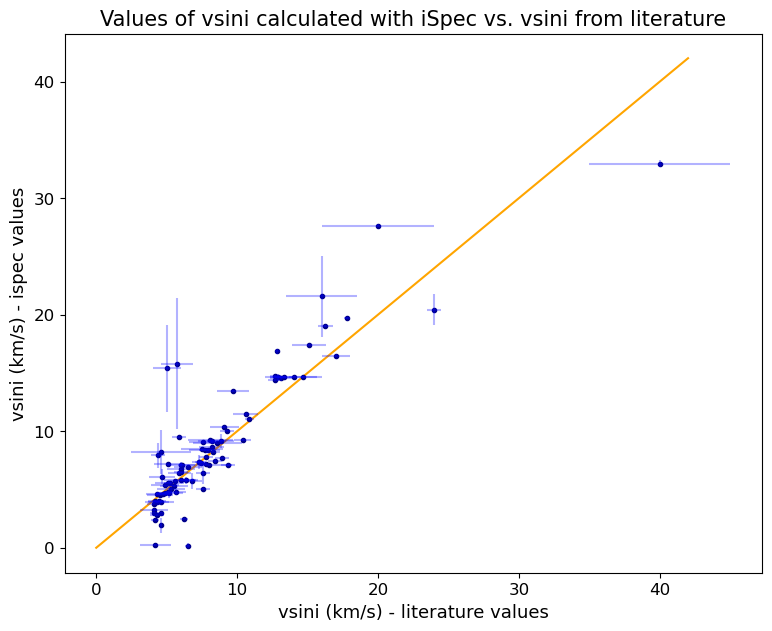

In [14]:
min_lit = np.min(vsini_lit)
min_sp = np.min(vsini)
max_lit = np.max(vsini_lit)
max_sp = np.max(vsini)

low = min(min_lit, min_sp)
up = max(max_lit, max_sp)

plt.figure(figsize=(9,7))
plt.plot([0,up+2],[0,up+2], color='orange', zorder=0)
plt.scatter(vsini_lit, vsini, color='darkblue', s=9, zorder=5) 
bar = np.array([-vsini_lit_err_down , vsini_lit_err_up], dtype=float)
plt.errorbar(vsini_lit, vsini, xerr=bar, yerr=vsini_err, fmt='none', ecolor='blue', alpha=0.3,zorder=10)
plt.xlabel('vsini (km/s) - literature values', size=13)
plt.ylabel('vsini (km/s) - ispec values', size=13)
plt.xticks(size=12)    
plt.yticks(size=12)
plt.title('Values of vsini calculated with iSpec vs. vsini from literature', size=15)
plt.show()

## vsini_lit - vsini_ispec vs. parameter (teff, logg, MH, vmic,alpha,vmac,limb darkening)

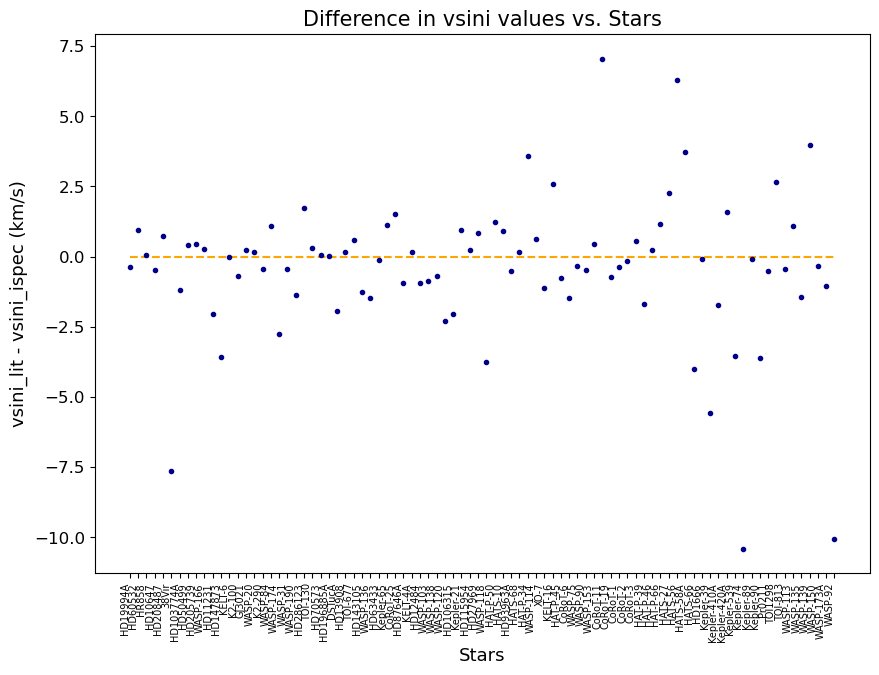

a:  -0.0007205980292565606 +/-  0.0007721768963234859
b: 4.066853538799337 +/-  4.80762038754598
pearson correlation coefficient, r:  -0.10129708402442157
Coefficient of determination, r²:  0.010261099231850724
p-value:  0.3533897319825927


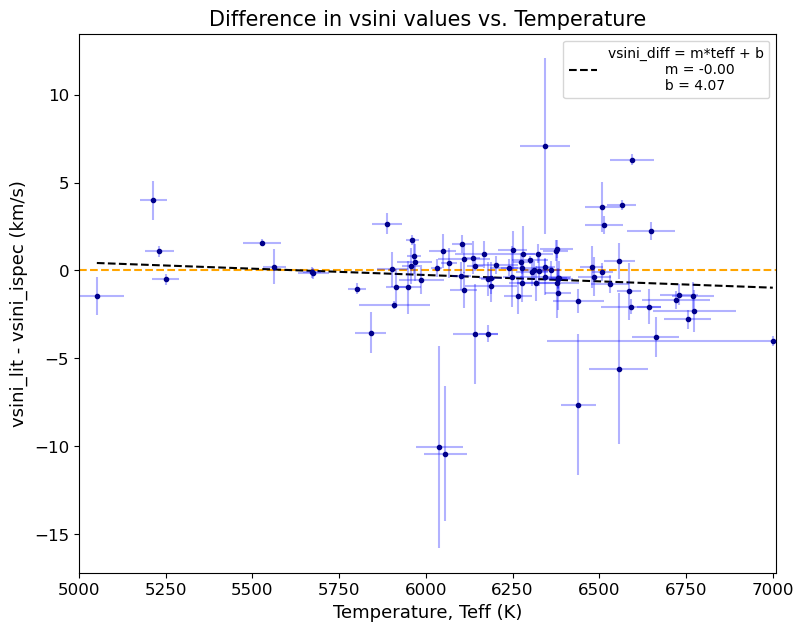

a:  -0.37438525335742384 +/-  2.0390517974722946
b: -0.3535601040192009 +/-  0.42520975677581524
pearson correlation coefficient, r:  -0.02002920458293567
Coefficient of determination, r²:  0.0004011690362250913
p-value:  0.8547638445266983


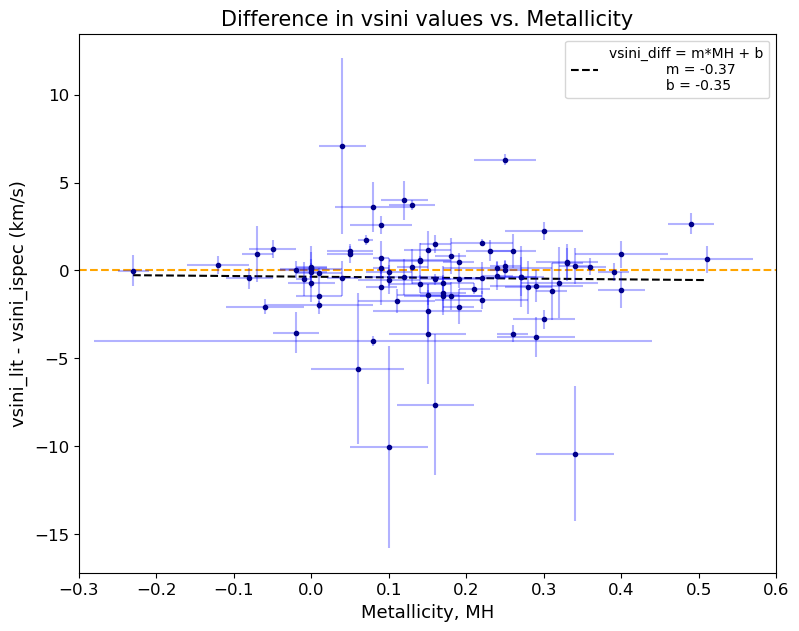

a:  -1.1331335936133837 +/-  0.6597649106967722
b: 1.274938080751321 +/-  1.0205981105554047
pearson correlation coefficient, r:  -0.18418648337913796
Coefficient of determination, r²:  0.03392466065957346
p-value:  0.08957609768101722


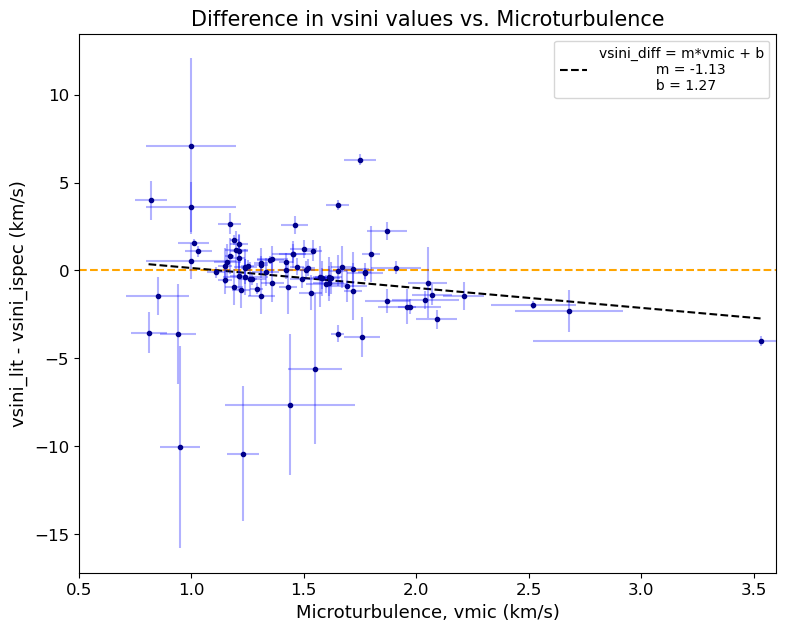

a:  -4.41343122261127 +/-  1.4856642327159846
b: 19.054329212967428 +/-  6.558309236880269
pearson correlation coefficient, r:  -0.3083353895631436
Coefficient of determination, r²:  0.09507071245705552
p-value:  0.0038737056998940592


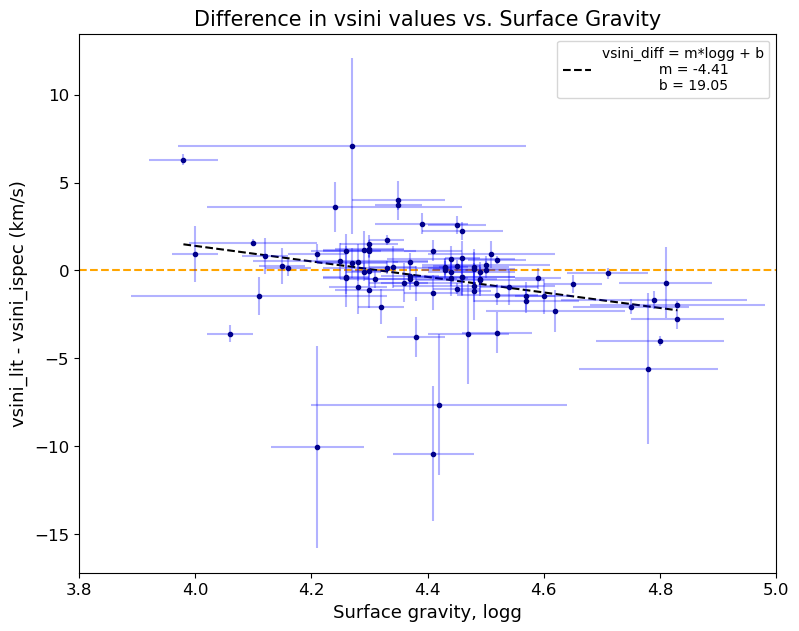

a:  -0.026690878309724955 +/-  0.011835518427149567
b: -0.23847849343534028 +/-  0.2845484255118055
pearson correlation coefficient, r:  -0.23893048731404384
Coefficient of determination, r²:  0.057087777768126464
p-value:  0.026724283206154328


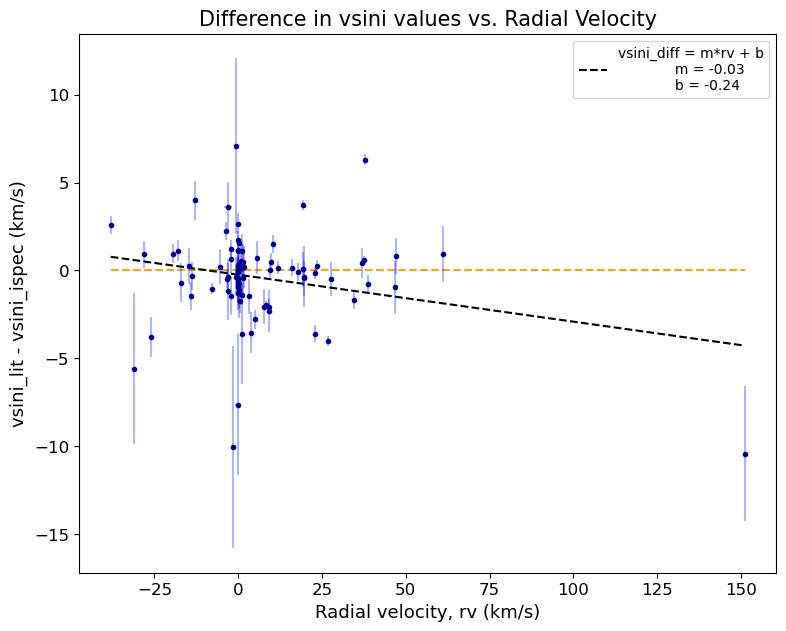

a:  6.291711894566883 +/-  23.03775511936086
b: -0.4312957091380646 +/-  0.29072863260542364
pearson correlation coefficient, r:  0.029784910618767358
Coefficient of determination, r²:  0.0008871409005679605
p-value:  0.7854432961650873


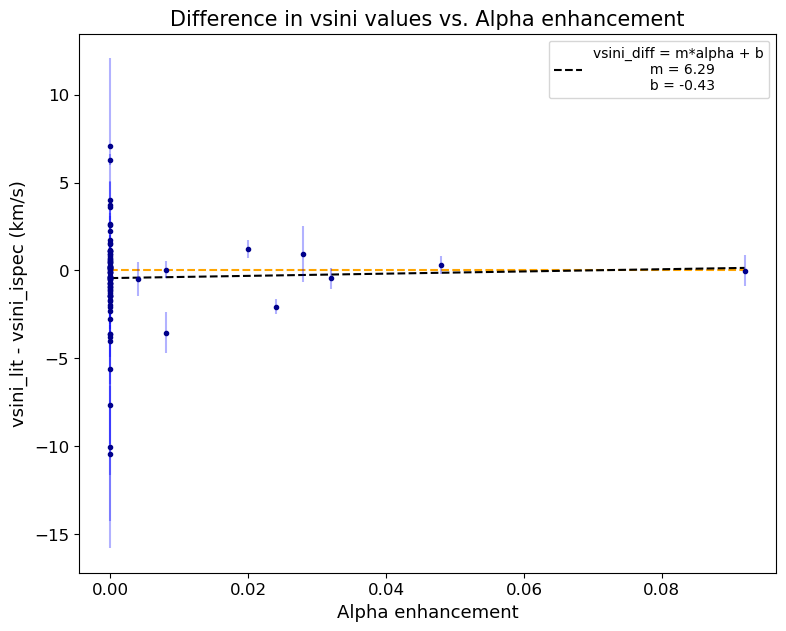

a:  -0.04320991123989946 +/-  0.22687420611892622
b: -0.19855982614343962 +/-  1.1555275376132617
pearson correlation coefficient, r:  -0.020776139710522508
Coefficient of determination, r²:  0.0004316479812711503
p-value:  0.8494101249993552


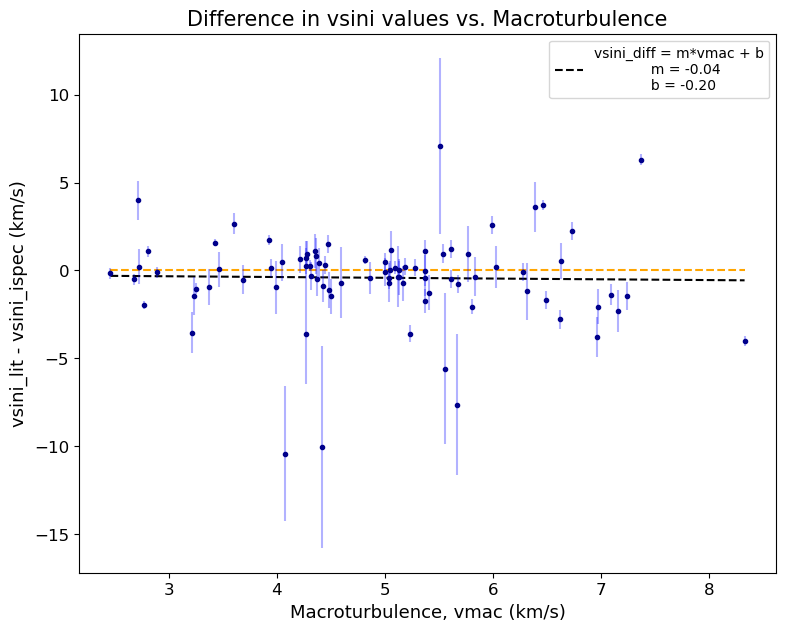

a:  3.467791663235227 +/-  8.87427071190667
b: -2.4218322792926807 +/-  5.151036654579119
pearson correlation coefficient, r:  0.04259771431106445
Coefficient of determination, r²:  0.0018145652645270647
p-value:  0.6969571666285813


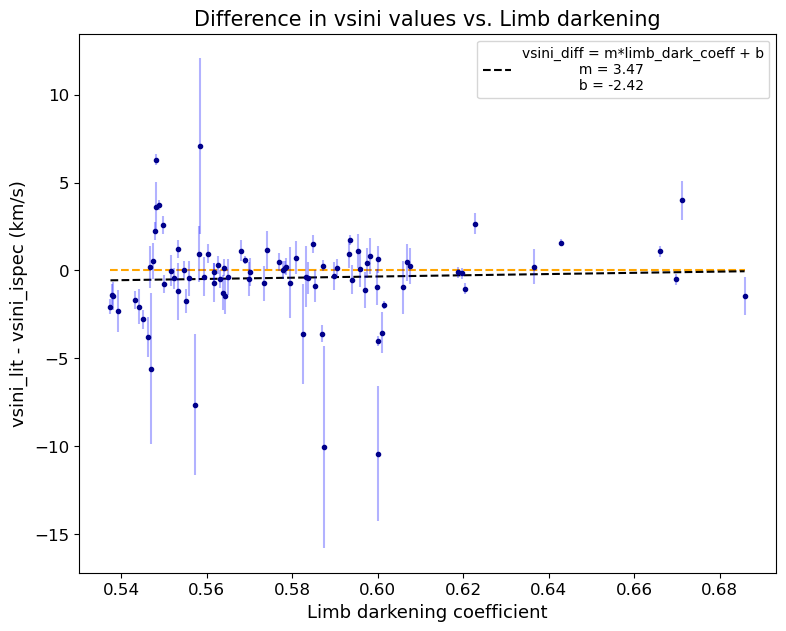

In [47]:
import scipy as sp

plt.figure(figsize=(10,7))
plt.scatter(stars, vsini_diff, color='darkblue', s=9) 
plt.plot(stars, np.zeros(len(stars), dtype=float), '--', color='orange', zorder=0)                      
plt.xlabel('Stars', size=13)
plt.ylabel('vsini_lit - vsini_ispec (km/s)', size=13)
plt.title('Difference in vsini values vs. Stars', size=15)
plt.xticks(rotation=90, ha='right', size=7)    
plt.yticks(size=12)
plt.show() 

plt.figure(figsize=(9,7))
fit = sp.stats.linregress(teff, vsini_diff)
a = fit.slope
b = fit.intercept
err_b = fit.intercept_stderr
err_a = fit.stderr
r = fit.rvalue
p = fit.pvalue
print('a: ', a, '+/- ', err_a)
print('b:', b , '+/- ', err_b)
#The Pearson correlation coefficient. The square of rvalue is equal to the coefficient of determination.
print('pearson correlation coefficient, r: ', r)
print('Coefficient of determination, r²: ', r**2)
#p-value
print('p-value: ', p)
plt.plot(np.sort(teff), a*(np.sort(teff))+b, '--k', label='vsini_diff = m*teff + b\n             m = {:.2f} \n             b = {:.2f}'.format(a,b))
plt.scatter(teff, vsini_diff, color='darkblue', s=9, zorder=5)
bar = np.array([vsini_diff_sigma_down , vsini_diff_sigma_up], dtype=float)
plt.errorbar(teff, vsini_diff, xerr=teff_err, yerr=bar, fmt='none', ecolor='blue', alpha=0.3)
#plt.plot(np.sort(teff), np.zeros(len(stars), dtype=float), '-', color='orange', zorder=0)
plt.plot([5000,7010], [0,0], '--', color='orange', zorder=0)
plt.xlabel('Temperature, Teff (K)', size=13)
plt.ylabel('vsini_lit - vsini_ispec (km/s)', size=13)
plt.title('Difference in vsini values vs. Temperature', size=15)
plt.xticks(size=12)    
plt.yticks(size=12)   
plt.xlim(5000,7010)
#plt.grid(zorder=0)
plt.legend()
plt.show() 

plt.figure(figsize=(9,7))
fit = sp.stats.linregress(MH, vsini_diff)
a = fit.slope
b = fit.intercept
err_b = fit.intercept_stderr
err_a = fit.stderr
r = fit.rvalue
p = fit.pvalue
print('a: ', a, '+/- ', err_a)
print('b:', b , '+/- ', err_b)
#The Pearson correlation coefficient. The square of rvalue is equal to the coefficient of determination.
print('pearson correlation coefficient, r: ', r)
print('Coefficient of determination, r²: ', r**2)
#p-value
print('p-value: ', p)
plt.plot(np.sort(MH), a*(np.sort(MH))+b, '--k', label='vsini_diff = m*MH + b\n             m = {:.2f} \n             b = {:.2f}'.format(a,b))
plt.scatter(MH, vsini_diff, color='darkblue', s=9, zorder=5) 
bar = np.array([vsini_diff_sigma_down , vsini_diff_sigma_up], dtype=float)
plt.errorbar(MH, vsini_diff, xerr=MH_err, yerr=bar, fmt='none', ecolor='blue', alpha=0.3)
#plt.plot(np.sort(MH), np.zeros(len(stars), dtype=float), '--', color='orange', zorder=0)  
plt.plot([-0.3,0.6], [0,0], '--', color='orange', zorder=0)
plt.xlabel('Metallicity, MH', size=13)
plt.ylabel('vsini_lit - vsini_ispec (km/s)', size=13)
plt.title('Difference in vsini values vs. Metallicity', size=15)
plt.xticks(size=12)    
plt.yticks(size=12)
plt.xlim(-0.3,0.6)
plt.legend()
#plt.grid(zorder=0)
plt.show() 

plt.figure(figsize=(9,7))
fit = sp.stats.linregress(vmic, vsini_diff)
a = fit.slope
b = fit.intercept
err_b = fit.intercept_stderr
err_a = fit.stderr
r = fit.rvalue
p = fit.pvalue
print('a: ', a, '+/- ', err_a)
print('b:', b , '+/- ', err_b)
#The Pearson correlation coefficient. The square of rvalue is equal to the coefficient of determination.
print('pearson correlation coefficient, r: ', r)
print('Coefficient of determination, r²: ', r**2)
#p-value
print('p-value: ', p)
plt.plot(np.sort(vmic), a*(np.sort(vmic))+b, '--k', label='vsini_diff = m*vmic + b\n             m = {:.2f} \n             b = {:.2f}'.format(a,b))
plt.scatter(vmic, vsini_diff, color='darkblue', s=9, zorder=5)
bar = np.array([vsini_diff_sigma_down , vsini_diff_sigma_up], dtype=float)
plt.errorbar(vmic, vsini_diff, xerr=vmic_err, yerr=bar, fmt='none', ecolor='blue', alpha=0.3)
#plt.plot(np.sort(vmic), np.zeros(len(stars), dtype=float), '-', color='orange', zorder=0)   
plt.plot([0.5,3.6], [0,0], '--', color='orange', zorder=0)
plt.xlabel('Microturbulence, vmic (km/s)', size=13)
plt.ylabel('vsini_lit - vsini_ispec (km/s)', size=13)
plt.title('Difference in vsini values vs. Microturbulence', size=15)
plt.xticks(size=12)    
plt.yticks(size=12) 
#plt.grid(zorder=0)
plt.xlim(0.5,3.6)
plt.legend()
plt.show() 

plt.figure(figsize=(9,7))
fit = sp.stats.linregress(logg, vsini_diff)
a = fit.slope
b = fit.intercept
err_b = fit.intercept_stderr
err_a = fit.stderr
r = fit.rvalue
p = fit.pvalue
print('a: ', a, '+/- ', err_a)
print('b:', b , '+/- ', err_b)
#The Pearson correlation coefficient. The square of rvalue is equal to the coefficient of determination.
print('pearson correlation coefficient, r: ', r)
print('Coefficient of determination, r²: ', r**2)
#p-value
print('p-value: ', p)
plt.plot(np.sort(logg), a*(np.sort(logg))+b, '--k', label='vsini_diff = m*logg + b\n             m = {:.2f} \n             b = {:.2f}'.format(a,b))
plt.scatter(logg, vsini_diff, color='darkblue', s=9, zorder=5) 
bar = np.array([vsini_diff_sigma_down , vsini_diff_sigma_up], dtype=float)
plt.errorbar(logg, vsini_diff, xerr=logg_err, yerr=bar, fmt='none', ecolor='blue', alpha=0.3)
#plt.plot(np.sort(logg), np.zeros(len(stars), dtype=float), '-', color='orange', zorder=0)                      
plt.plot([3.8,5], [0,0], '--', color='orange', zorder=0)
plt.xlabel('Surface gravity, logg', size=13)
plt.ylabel('vsini_lit - vsini_ispec (km/s)', size=13)
plt.title('Difference in vsini values vs. Surface Gravity', size=15)
plt.xticks(size=12)    
plt.yticks(size=12)   
#plt.grid(zorder=0)
plt.xlim(3.8,5)
plt.legend()
plt.show() 

plt.figure(figsize=(9,7))
fit = sp.stats.linregress(rv, vsini_diff)
a = fit.slope
b = fit.intercept
err_b = fit.intercept_stderr
err_a = fit.stderr
r = fit.rvalue
p = fit.pvalue
print('a: ', a, '+/- ', err_a)
print('b:', b , '+/- ', err_b)
#The Pearson correlation coefficient. The square of rvalue is equal to the coefficient of determination.
print('pearson correlation coefficient, r: ', r)
print('Coefficient of determination, r²: ', r**2)
#p-value
print('p-value: ', p)
plt.plot(np.sort(rv), a*(np.sort(rv))+b, '--k', label='vsini_diff = m*rv + b\n             m = {:.2f} \n             b = {:.2f}'.format(a,b))
plt.scatter(rv, vsini_diff, color='darkblue', s=9, zorder=5) 
bar = np.array([vsini_diff_sigma_down , vsini_diff_sigma_up], dtype=float)
plt.errorbar(rv, vsini_diff, xerr=rv_err, yerr=bar, fmt='none', ecolor='blue', alpha=0.3)
plt.plot(np.sort(rv), np.zeros(len(stars), dtype=float), '--', color='orange', zorder=0)                      
plt.xlabel('Radial velocity, rv (km/s)', size=13)
plt.ylabel('vsini_lit - vsini_ispec (km/s)', size=13)
plt.title('Difference in vsini values vs. Radial Velocity', size=15)
plt.xticks(size=12)    
plt.yticks(size=12)   
#plt.grid(zorder=0)
plt.legend()
plt.show() 

plt.figure(figsize=(9,7))
fit = sp.stats.linregress(alpha, vsini_diff)
a = fit.slope
b = fit.intercept
err_b = fit.intercept_stderr
err_a = fit.stderr
r = fit.rvalue
p = fit.pvalue
print('a: ', a, '+/- ', err_a)
print('b:', b , '+/- ', err_b)
#The Pearson correlation coefficient. The square of rvalue is equal to the coefficient of determination.
print('pearson correlation coefficient, r: ', r)
print('Coefficient of determination, r²: ', r**2)
#p-value
print('p-value: ', p)
plt.plot(np.sort(alpha), a*(np.sort(alpha))+b, '--k', label='vsini_diff = m*alpha + b\n             m = {:.2f} \n             b = {:.2f}'.format(a,b))
plt.scatter(alpha, vsini_diff, color='darkblue', s=9, zorder=5) 
bar = np.array([vsini_diff_sigma_down , vsini_diff_sigma_up], dtype=float)
plt.errorbar(alpha, vsini_diff, xerr=alpha_err, yerr=bar, fmt='none', ecolor='blue', alpha=0.3)
plt.plot(np.sort(alpha), np.zeros(len(stars), dtype=float), '--', color='orange', zorder=0)                      
plt.xlabel('Alpha enhancement', size=13)
plt.ylabel('vsini_lit - vsini_ispec (km/s)', size=13)
plt.title('Difference in vsini values vs. Alpha enhancement', size=15)
plt.xticks(size=12)    
plt.yticks(size=12)   
#plt.grid(zorder=0)
plt.legend()
plt.show() 

plt.figure(figsize=(9,7))
fit = sp.stats.linregress(vmac, vsini_diff)
a = fit.slope
b = fit.intercept
err_b = fit.intercept_stderr
err_a = fit.stderr
r = fit.rvalue
p = fit.pvalue
print('a: ', a, '+/- ', err_a)
print('b:', b , '+/- ', err_b)
#The Pearson correlation coefficient. The square of rvalue is equal to the coefficient of determination.
print('pearson correlation coefficient, r: ', r)
print('Coefficient of determination, r²: ', r**2)
#p-value
print('p-value: ', p)
plt.plot(np.sort(vmac), a*(np.sort(vmac))+b, '--k', label='vsini_diff = m*vmac + b\n             m = {:.2f} \n             b = {:.2f}'.format(a,b))
plt.scatter(vmac, vsini_diff, color='darkblue', s=9, zorder=5) 
bar = np.array([vsini_diff_sigma_down , vsini_diff_sigma_up], dtype=float)
plt.errorbar(vmac, vsini_diff, yerr=bar, fmt='none', ecolor='blue', alpha=0.3)
plt.plot(np.sort(vmac), np.zeros(len(stars), dtype=float), '--', color='orange', zorder=0)                      
plt.xlabel('Macroturbulence, vmac (km/s)', size=13)
plt.ylabel('vsini_lit - vsini_ispec (km/s)', size=13)
plt.title('Difference in vsini values vs. Macroturbulence', size=15)
plt.xticks(size=12)    
plt.yticks(size=12)  
#plt.grid(zorder=0)
plt.legend()
plt.show() 

plt.figure(figsize=(9,7))
fit = sp.stats.linregress(limb_dark_coeff, vsini_diff)
a = fit.slope
b = fit.intercept
err_b = fit.intercept_stderr
err_a = fit.stderr
r = fit.rvalue
p = fit.pvalue
print('a: ', a, '+/- ', err_a)
print('b:', b , '+/- ', err_b)
#The Pearson correlation coefficient. The square of rvalue is equal to the coefficient of determination.
print('pearson correlation coefficient, r: ', r)
print('Coefficient of determination, r²: ', r**2)
#p-value
print('p-value: ', p)
plt.plot(np.sort(limb_dark_coeff), a*(np.sort(limb_dark_coeff))+b, '--k', label='vsini_diff = m*limb_dark_coeff + b\n             m = {:.2f} \n             b = {:.2f}'.format(a,b))
plt.scatter(limb_dark_coeff, vsini_diff, color='darkblue', s=9, zorder=5) 
bar = np.array([vsini_diff_sigma_down , vsini_diff_sigma_up], dtype=float)
plt.errorbar(limb_dark_coeff, vsini_diff, yerr=bar, fmt='none', ecolor='blue', alpha=0.3)
plt.plot(np.sort(limb_dark_coeff), np.zeros(len(stars), dtype=float), '--', color='orange', zorder=0)                      
plt.xlabel('Limb darkening coefficient', size=13)
plt.ylabel('vsini_lit - vsini_ispec (km/s)', size=13)
plt.title('Difference in vsini values vs. Limb darkening', size=15)
plt.xticks(size=12)    
plt.yticks(size=12) 
#plt.grid(zorder=0)
plt.legend()
plt.show() 
